In [1]:
using QuantumOptics
using PyPlot

# Single ptl

In [321]:
N = 6
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb'

#
for i in 1:N
    Htb += 2*t*transition(b,i,i)
end

In [322]:
E1, U1 = eigenstates(dense(Htb));

In [323]:
E1[2], E1[3]

(0.9999999999999979, 1.0000000000000009)

In [324]:
U1[2]-1im*U1[2]

Ket(dim=6)
  basis: NLevel(N=6)
   0.2886751345948132 - 0.2886751345948132im
  -0.2886751345948133 + 0.2886751345948133im
  -0.5773502691896258 + 0.5773502691896258im
 -0.28867513459481353 + 0.28867513459481353im
  0.28867513459481287 - 0.28867513459481287im
   0.5773502691896248 - 0.5773502691896248im

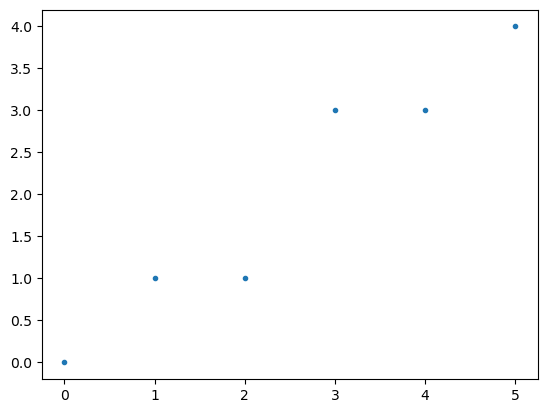

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa1fb9e9e10>

In [325]:
plot(E1, ".")

In [326]:
bsub = SubspaceBasis(b, U1[1:2])

Subspace(superbasis=NLevel(N=6), states:2)

# Two-body

In [327]:
b2 = b ⊗ b
b2sub = bsub ⊗ bsub

[Subspace(superbasis=NLevel(N=6), states:2) ⊗ Subspace(superbasis=NLevel(N=6), states:2)]

In [328]:
#Ket(b2, [0,0,1,0,0,0,0,0,0])

In [329]:
#Ket(b,[0,0,1]) ⊗ Ket(b, [1,0,0]) 

In [330]:
U0 = -0.1
H_Hub = SparseOperator(b2, b2)
for i in 1:N
    H_Hub += U0*transition(b,i,i)⊗transition(b,i,i)
end
H2 = embed(b2, 1, Htb) + embed(b2, 2, Htb) + H_Hub;
eigenenergies(dense(H2))

36-element Vector{Float64}:
 -0.017079026582178317
  0.9661070488476315
  0.9661070488476315
  0.999999999999998
  1.0000000000000022
  1.9665813911918841
  1.9824938248060118
  1.982493824806012
  2.000000000000001
  2.9665112029425917
  2.9665112029425935
  2.9999999999999933
  3.000000000000003
  ⋮
  4.966879713980223
  4.999999999999999
  5.0000000000000036
  5.966766343590182
  5.984115258271168
  5.984115258271171
  6.0
  6.9672180570802125
  6.967218057080214
  6.9999999999999964
  6.999999999999999
  7.98373129180011

In [331]:
P1 = projector(b,bsub);

In [332]:
P2 = P1 ⊗ P1;

In [333]:
H_Hub_sub = dagger(P2)*H_Hub*P2;

# Many-Body

In [334]:
Nparticles = 2
b_mb = ManyBodyBasis(b, bosonstates(b, Nparticles))
H_mb = manybodyoperator(b_mb, Htb) + manybodyoperator(b_mb, H_Hub / 2)
#H_mb = manybodyoperator(b_mb, Htb) + H_Hub
Emb, Umb = eigenstates(dense(H_mb));
Emb

21-element Vector{Float64}:
 -0.017079026582176353
  0.9661070488476305
  0.9661070488476319
  1.9665813911918841
  1.9824938248060122
  1.982493824806013
  2.9665112029425873
  2.966511202942589
  3.9
  3.966674894072147
  3.9666748940721552
  3.9999999999999996
  3.9999999999999996
  4.966879713980216
  4.96687971398022
  5.966766343590175
  5.984115258271166
  5.984115258271168
  6.967218057080209
  6.967218057080215
  7.9837312918001055

# 2 particle

In [335]:
U0 = -.1
H_Hub2 = SparseOperator(b_mb)
for i in 1:N
    H_Hub2 += U0 * number(b_mb,i) * ( number(b_mb,i) - identityoperator(b_mb) ) / 2
end
H_mb = manybodyoperator(b_mb, Htb) + H_Hub2;
Emb, Umb = eigenstates(dense(H_mb));
Emb

21-element Vector{Float64}:
 -0.017079026582176353
  0.9661070488476305
  0.9661070488476319
  1.9665813911918841
  1.9824938248060122
  1.982493824806013
  2.9665112029425873
  2.966511202942589
  3.9
  3.966674894072147
  3.9666748940721552
  3.9999999999999996
  3.9999999999999996
  4.966879713980216
  4.96687971398022
  5.966766343590175
  5.984115258271166
  5.984115258271168
  6.967218057080209
  6.967218057080215
  7.9837312918001055

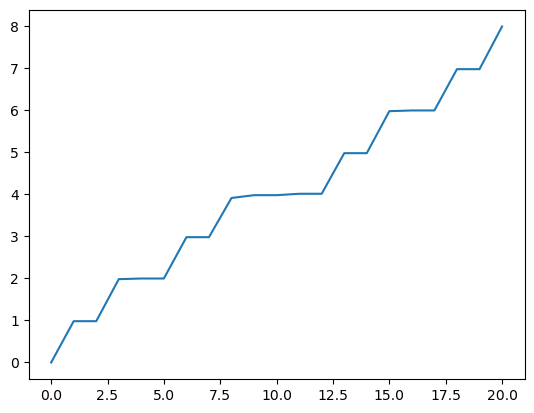

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa1fbb43490>

In [336]:
plot(Emb)

# Cooper problem in a lattice

In [337]:
dk = 2*pi/N
k1list = collect( -pi:dk:pi-dk )
kF = -0.7

klist = k1list[ abs.(k1list).>kF ]

6-element Vector{Float64}:
 -3.141592653589793
 -2.0943951023931957
 -1.0471975511965979
  0.0
  1.0471975511965974
  2.094395102393195

In [338]:
function fEK(K) # below Eq. 3
   return -2*t*cos(K/2) 
end

fEK (generic function with 1 method)

In [339]:
function fKq(K,q) # below Eq. 3
   return 2*fEK(K)*(cos(q)-1) + 2*(2*t+fEK(K))
end

fKq (generic function with 1 method)

In [340]:
function fE(E,K,U0,klist)
  return sum( ( fKq.(K, klist) .- E ).^(-1) )/N + 1/U0
end

fE (generic function with 1 method)

In [341]:
E = -0.010425975326729287
K = 0.
fE(E, K, U0, klist)

6.227782408974765

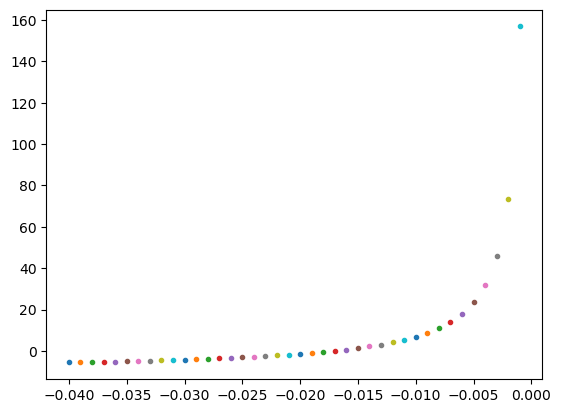

In [342]:
for E in -0.04:0.001:0.
    plot(E, fE(E, K, U0, klist),".")
end

In [343]:
#import Pkg; Pkg.add("Roots")

In [344]:
using Roots

In [345]:
fzero( x->fE(x,K,U0,klist) , -0.01)

-0.0170790265821762